In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

### plantando cemente para sempre reproduzir com mesmo dado

In [2]:
np.random.seed(42)

In [10]:
dfcc = pd.read_csv('/Users/dgoalmeida/Documents/datascience/data/DIAG_CANCER.CSV')

In [11]:
dfcc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
dfcc.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

### verificando dado ausente

In [15]:
import missingno as msno

<AxesSubplot:>

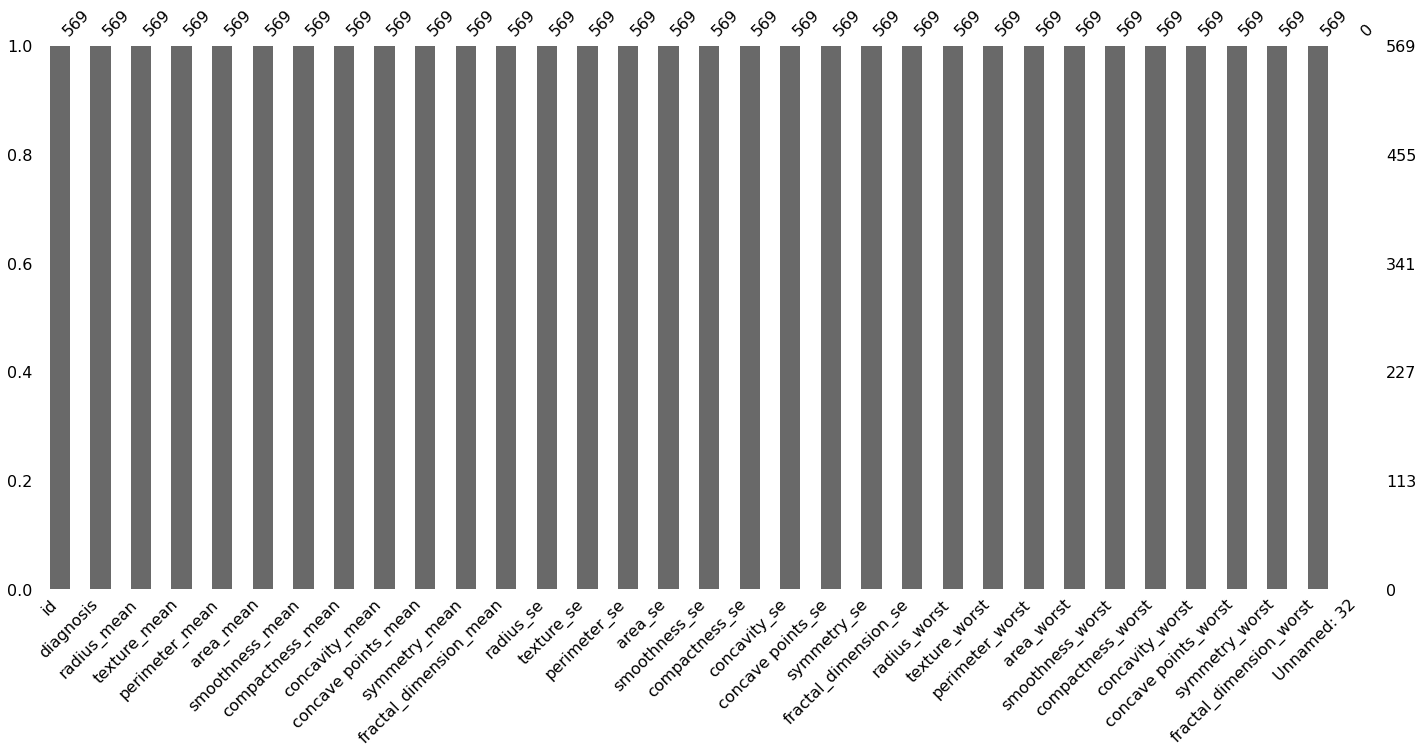

In [17]:
msno.bar(dfcc)

### implementando analise de componentes principais usando sklearn decomposition PCA

In [18]:
from sklearn.decomposition import PCA

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [19]:
pca = PCA(random_state=42)

### normalizando os dados (deixando na mesma escala)

In [21]:
cancer_scaled = scale(dfcc.drop(['Unnamed: 32', 'diagnosis','id'], axis=1))

In [23]:
pd.DataFrame(cancer_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.083681,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.083372,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,-0.083477,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.084467,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-0.083405,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [25]:
pca.fit(cancer_scaled)

PCA(random_state=42)

In [26]:
# autovalores dos componentes principaios
pca.explained_variance_

array([1.27081798e+01, 5.36644589e+00, 2.82437657e+00, 1.98888922e+00,
       1.65555823e+00, 1.22138747e+00, 9.76099113e-01, 6.64802943e-01,
       4.73897707e-01, 3.90545181e-01, 3.46132029e-01, 2.93075939e-01,
       2.60460338e-01, 2.39174847e-01, 1.56513512e-01, 9.40553844e-02,
       7.79567939e-02, 5.75614176e-02, 5.19315295e-02, 4.45054090e-02,
       3.10516595e-02, 2.97913326e-02, 2.71510449e-02, 2.39789982e-02,
       1.69896626e-02, 1.54840110e-02, 7.96579839e-03, 6.67673022e-03,
       1.48362659e-03, 6.94758269e-04])

In [32]:
x = pd.DataFrame()
x = np.arange(pca.explained_variance_.shape[0]) + 1

[]

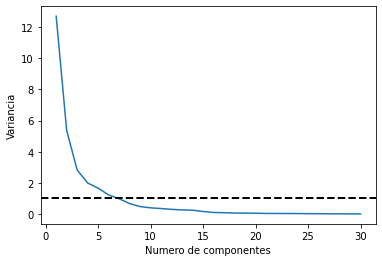

In [33]:
plt.plot(x, pca.explained_variance_)
plt.axhline(1.0, color='black',linestyle='--', linewidth=2)
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia')
plt.plot()

[]

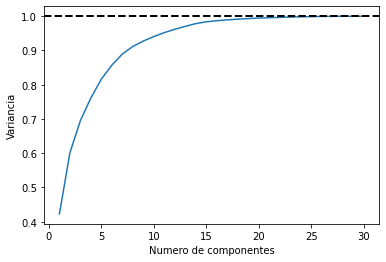

In [31]:
## obserevando a variancia em cima do percential para decidir quantos componentes usar
plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.axhline(1.0, color='black',linestyle='--', linewidth=2)
plt.xlabel('Numero de componentes')
plt.ylabel('Variancia')
plt.plot()

In [34]:
pca_fitted = PCA(n_components=7, random_state=42)
new_dataset = pd.DataFrame(pca_fitted.fit_transform(cancer_scaled))

In [35]:
new_dataset.head()

,0,1,2,3,4,5,6
0,9.232415,1.427938,-1.102314,3.724393,-1.067809,1.331706,-0.401088
1,1.893203,-3.611842,-0.529611,1.105885,0.653385,0.029518,0.016977
2,5.474679,-1.230033,-0.548286,0.938334,-0.151427,0.511968,-0.196518
3,7.857230,9.693280,-3.198059,0.243652,-3.052077,2.940624,-0.521161
4,3.561930,-1.901060,1.400166,2.898736,0.660009,-1.245717,0.125975


In [36]:
pd.DataFrame(pca_fitted.components_.T * np.sqrt(pca_fitted.explained_variance_),
            columns=['PCA1','PCA2','PCA3','PCA4','PCA5','CA6','PCA7'],
            index=dfcc.drop(['Unnamed: 32', 'diagnosis','id'], axis=1).columns.values)

,PCA1,PCA2,PCA3,PCA4,PCA5,CA6,PCA7
radius_mean,-0.109333,0.008998,0.051483,0.131133,-0.125629,0.242434,0.940824
texture_mean,0.373475,-0.175158,0.103502,-0.842030,-0.090056,-0.018004,0.062018
perimeter_mean,0.793975,-0.556144,-0.017082,0.066639,0.052636,0.025168,0.017113
area_mean,0.768589,-0.594229,0.046786,0.084235,0.019399,0.004458,0.024908
smoothness_mean,0.545686,0.412626,-0.172969,0.233648,-0.456532,-0.330983,-0.003541
compactness_mean,0.892247,0.311324,-0.123748,0.046032,0.015669,-0.013020,0.011201
concavity_mean,0.948887,0.087787,0.004550,0.028369,0.111940,-0.001464,0.027733
concave points_mean,0.943400,-0.137450,-0.043387,0.098528,-0.049573,-0.057673,0.001028
symmetry_mean,0.530329,0.423055,-0.065184,0.105289,-0.395032,0.362508,-0.153636
fractal_dimension_mean,0.287872,0.857882,-0.034986,0.063706,-0.058896,-0.128853,0.043734
